# Predicting Diabetes

## Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# inline plotting instead of separate window
%matplotlib inline

## Load and review data

In [33]:
df = pd.read_csv("./data/pima-data.csv")

In [34]:
df.shape # (rows, colums)

(768, 10)

In [35]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True

In [36]:
df.tail(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  \
763        10           101            76         48      180  32.9   
764         2           122            70         27        0  36.8   
765         5           121            72         23      112  26.2   
766         1           126            60          0        0  30.1   
767         1            93            70         31        0  30.4   

     diab_pred  age    skin  diabetes  
763      0.171   63  1.8912     False  
764      0.340   27  1.0638     False  
765      0.245   30  0.9062     False  
766      0.349   47  0.0000      True  
767      0.315   23  1.2214     False

In [37]:
df.isnull().values.any()

False

In [38]:
def plot_correlation(df, size=11):
    """
    This function plots a graphical correlation matrix for each pair of columns in the dataframe
    (basically, it checks if there are a pair of columns that are very similar or the same)

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns. Blue -> Cyan -> Yellow (less to more correlated)
                                               0 -----------------> 1
                                               Expect a yellow line running from top left to bottom right
    """
    correlation = df.corr() # pandas dataframe correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(correlation) # color code the rectangles by correlation value
    plt.xticks(range(len(correlation.columns)), correlation.columns) # draw X tick marks
    plt.yticks(range(len(correlation.columns)), correlation.columns) # draw y tick marks
    

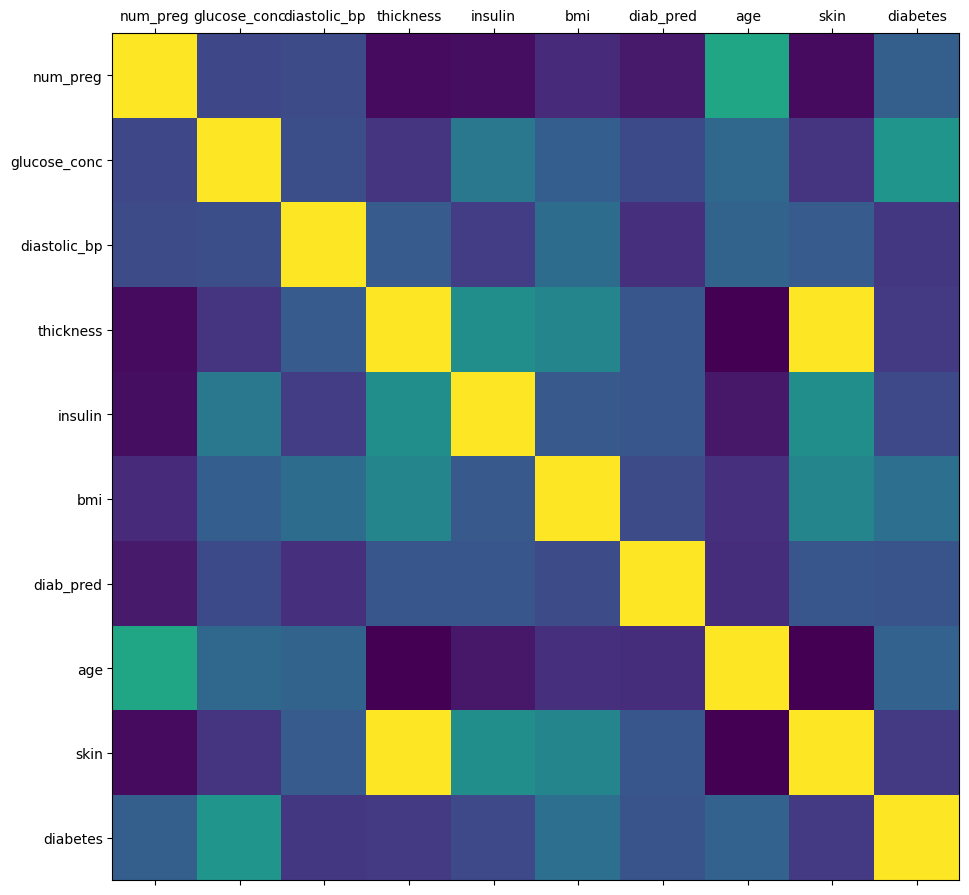

In [39]:
plot_correlation(df)

In [40]:
del df['skin']

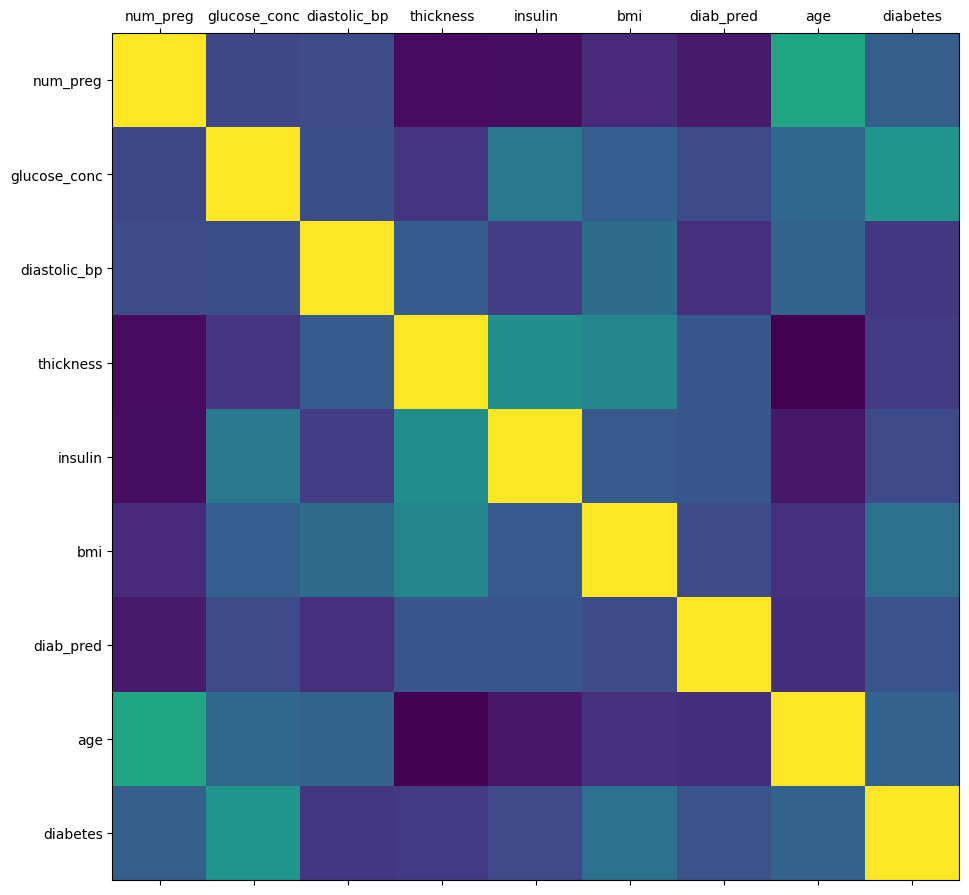

In [41]:
plot_correlation(df)

## Check Data Types

In [42]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50      True  
1   31     False  
2   32      True  
3   21     False  
4   33      True

Change True to 1, False to 0

In [43]:
diabetes_map = {True : 1, False : 0} # standardization dictionary

In [44]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [45]:
df.head(5)

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50         1  
1   31         0  
2   32         1  
3   21         0  
4   33         1

## Check true/false ratio

An even ratio means predictions will be better, extreme ratios indicate that cases are rare and will be hard to predict

In [46]:
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases:   {0}  ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases:  {0}  ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases:   268  (34.90%)
Number of False cases:  500  (65.10%)


## Splitting the data
70% for training, 30% for testing

In [47]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values      # these columns are evaluated for prediction
y = df[predicted_class_names].values  # this is the attribute we're trying to predict (1=true, 0=false) column (1 X m)
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)

Check that we have a 70% train and 30% test split of the data

In [48]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


### Verify predicted value was split correctly
A correct split means that the true/false ratio for diabetes in the training data AND test data match the ratio we found earlier

In [49]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Post-split Data Preparation

### Hidden missing values
An example of a possible hidden missing value is 0's

In [50]:
df.head()

num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50         1  
1   31         0  
2   32         1  
3   21         0  
4   33         1

Are these 0 values possible? For example: how can someone have a skin thickness value of 0?

How many rows have unexpected 0 values?

In [51]:
print(f"# rows in dataframe: {format(len(df))}")
print(f"# rows missing glucose_conc: {format(len(df.loc[df['glucose_conc'] == 0]))}")
print(f"# rows missing diastolic_bp: {format(len(df.loc[df['diastolic_bp'] == 0]))}")
print(f"# rows missing thickness: {format(len(df.loc[df['thickness'] == 0]))}")
print(f"# rows missing insulin: {format(len(df.loc[df['insulin'] == 0]))}")
print(f"# rows missing bmi: {format(len(df.loc[df['bmi'] == 0]))}")
print(f"# rows missing diab_pred: {format(len(df.loc[df['diab_pred'] == 0]))}")
print(f"# rows missing age: {format(len(df.loc[df['age'] == 0]))}")

# rows in dataframe: 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


### Impute with the mean
Since there are many values with 0's that do not make sense we will impute (replace)

these values with the mean of the attribute (we don't drop these values because it would mean dropping 50% of our data)

In [52]:
from sklearn.impute import SimpleImputer

# Impute all 0 values with mean
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

## Performance on Training Data

In [54]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# accuracy
print(f"Accuracy: {format(metrics.accuracy_score(y_train, nb_predict_train))}")

Accuracy: 0.7541899441340782


## Performance on Test Data

In [55]:
# predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# accuracy
print(f"Accuracy: {format(metrics.accuracy_score(y_test, nb_predict_test))}")

Accuracy: 0.7359307359307359


### Metrics

[[TRUE_NEGATIVE FALSE_POSITIVE]

[FALSE_NEGATIVE TRUE_POSITIVE]]

Recall (true positive rate) = TP/(TP+FN) -> How well the model is predicting diabetes, when it is actually diabetes

Precision (positive predictor value) = TP/(TP+FP) -> How often the patient actually had diabetes when the model said they would

In [56]:
print("Confusion Matrix")
print(f"{format(metrics.confusion_matrix(y_test, nb_predict_test))}\n")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Training second Algorithm - Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

# create Random Forest model object and train it with the data
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

### Performance Training Data

In [58]:
rf_predict_train = rf_model.predict(X_train)

print(f"Accuracy: {format(metrics.accuracy_score(y_train, rf_predict_train))}")

Accuracy: 1.0


### Performance Test Data

In [59]:
rf_predict_test = rf_model.predict(X_test)

print(f"Accuracy: {format(metrics.accuracy_score(y_test, rf_predict_test))}")

Accuracy: 0.7402597402597403


### Metrics

In [60]:
print("Confusion Matrix")
print(f"{format(metrics.confusion_matrix(y_test, rf_predict_test))}\n")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[119  32]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       151
           1       0.62      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Training third Algorithm - Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

# create Logistic Regression model object and train it with data
lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.7, max_iter=400, random_state=42)

### Performance Training Data

In [65]:
lr_predict_train = lr_model.predict(X_train)

print(f"Accuracy: {format(metrics.accuracy_score(y_train, lr_predict_train))}")

Accuracy: 0.7877094972067039


### Performance Test Data

In [66]:
lr_predict_test = lr_model.predict(X_test)

print(f"Accuracy: {format(metrics.accuracy_score(y_test, lr_predict_test))}")

Accuracy: 0.7359307359307359


### Metrics

In [67]:
print("Confusion Matrix")
print(f"{format(metrics.confusion_matrix(y_test, lr_predict_test))}\n")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Confusion Matrix
[[123  28]
 [ 33  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



Setting regularization parameter (to achieve a higher recall)

1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

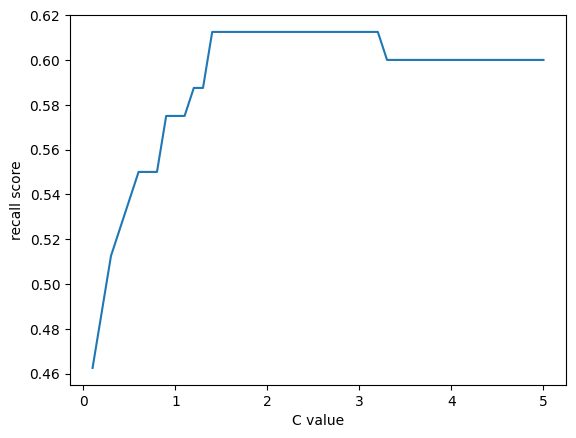

In [87]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    # train Logistic Regression
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver="liblinear")
    lr_model_loop.fit(X_train, y_train.ravel())
    # check performance
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    # record highest performing c val
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    # increment while loop
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

## Logistic regression with class_weight='balanced'

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

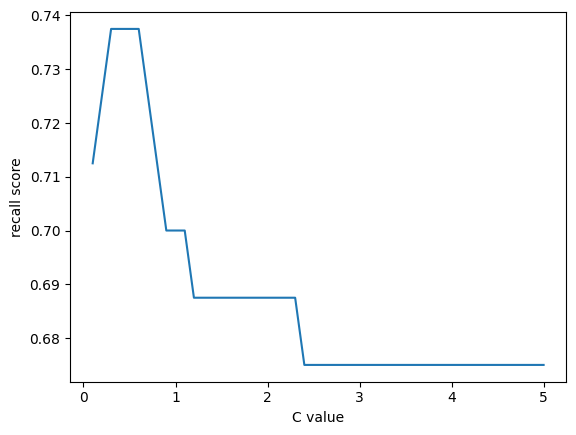

In [89]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0

while (C_val < C_end):
    # train Logistic Regression
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver="liblinear", class_weight="balanced")
    lr_model_loop.fit(X_train, y_train.ravel())
    # check performance
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    # record highest performing c val
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    # increment while loop
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Best Performance Metrics

In [93]:
# create Logistic Regression model object and train it with data
lr_model = LogisticRegression(C=best_score_C_val, random_state=42, solver="liblinear", class_weight="balanced")
lr_model.fit(X_train, y_train.ravel())

lr_predict_train = lr_model.predict(X_train)
print(f"Training Data Accuracy: {format(metrics.accuracy_score(y_train, lr_predict_train))}")

lr_predict_test = lr_model.predict(X_test)
print(f"Test Data Accuracy: {format(metrics.accuracy_score(y_test, lr_predict_test))}")

print("")
print("Confusion Matrix")
print(f"{format(metrics.confusion_matrix(y_test, lr_predict_test))}\n")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Training Data Accuracy: 0.74487895716946
Test Data Accuracy: 0.7142857142857143

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



## Logistic Regression Cross-Validation (CV)

In [95]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", solver="liblinear")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False, solver='liblinear')

### Performance for test data

In [96]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print(f"Accuracy: {format(metrics.accuracy_score(y_test, lr_cv_predict_test))}")
print("")
print("Confusion Matrix")
print(f"{format(metrics.confusion_matrix(y_test, lr_cv_predict_test))}\n")

print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7142857142857143

Confusion Matrix
[[110  41]
 [ 25  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       151
           1       0.57      0.69      0.62        80

    accuracy                           0.71       231
   macro avg       0.69      0.71      0.70       231
weighted avg       0.73      0.71      0.72       231

